<a href="https://colab.research.google.com/github/mnjaaga/Imbalanced-Dataset/blob/main/ML_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program predicts if a passanger will survive on the titanic

In [ ]:
#pip install matplotli

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# load the data
titanic = sns.load_dataset('titanic')

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
#count the number of rows & columns

titanic.shape

(891, 15)

In [ ]:
# Get some statistics/ only for numerical columns
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# get a count of the number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

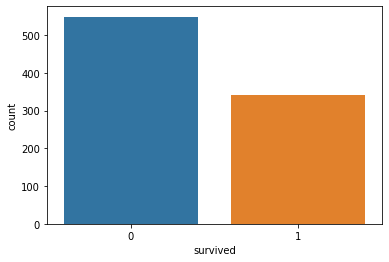

In [ ]:
#visualize the # of survivors

#ax = sns.countplot(titanic ['survived'])
ax = sns.countplot(x = 'survived', data=titanic)

#visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'
● Pclass: passenger class (1 = 1st, 2 = 2nd, and 3 = 3rd)
● SexNum: gender of the passengers
● Age: age of the passengers
● SibSp: number of siblings/spouses aboard
● Parch: number of parents/children aboard
● Fare: passenger fares
● Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, and S = Southampton)
● Survived: 0 = No and 1 = Yes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

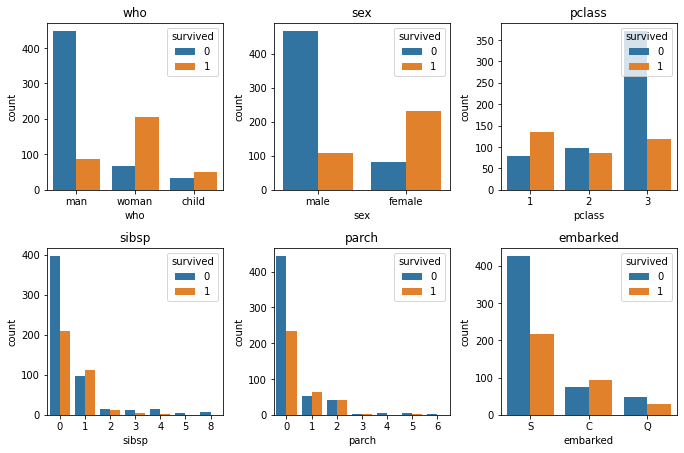

In [ ]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
n_rows = 2
n_cols = 3

#the subplot grid and figure size of each graph

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *3.2, n_rows * 3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c #index to go through the number of columns
    ax = axs[r][c]
    sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived', loc = 'upper right')
    plt.tight_layout()

In [ ]:
#look at survival rate by sex

titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [ ]:
# look at survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

#pivot_table

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


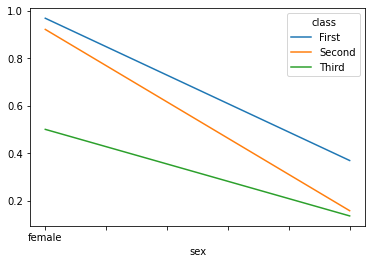

In [ ]:
# look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()
#titanic.pivot_table('survived', ['sex', age], 'class')

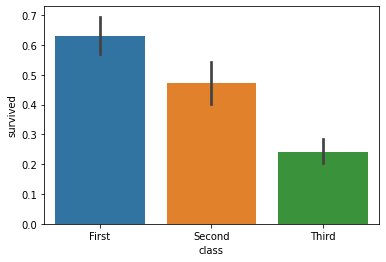

In [ ]:
#plot the survival rate of each class
sns.barplot(x='class', y='survived', data=titanic)

In [ ]:
# look at survival rate by sex, age & class
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

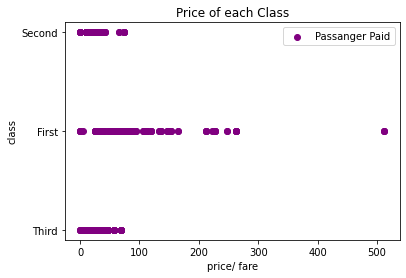

In [ ]:
#plot the prices paid for each class

plt.scatter(titanic['fare'], titanic['class'], color= 'purple', label='Passanger Paid')
plt.ylabel('class')
plt.xlabel('price/ fare')
plt.title('Price of each Class')
plt.legend()
plt.show()

In [ ]:
#count the empty values in each column

titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# look at all of the values in each column and get a count
# this is to help identify redundant columns that need to be deleted from the data
# the preference is to retain/keep the numeric values & get rid of booleans(yes/no, true/false)
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [ ]:
#drop the columns 
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)



In [ ]:
#remove the rows with missing values
titanic = titanic.dropna(subset = ['embarked', 'age'])

In [ ]:
#count the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

In [ ]:
#look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
# print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
# the above results show all but 2 columns have data type object - all others are numeric values

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

#Encode the embark column
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [ ]:
# print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
#proof that all the columns are now converted to integer
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
# split the data into independent 'x' and dependent 'y' variables
# essential in training the independent X to come up with dependent variables 'y''

X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [ ]:
#create training sets
#split the data set into 80% training & 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
# create a function with many machine learning models

def models(X_train, Y_train):

  #use Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
  knn.fit(X_train, Y_train)

  #use SVC (linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  # use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #use Gaussian/NB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)


  #use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #print the training accuracy for each model
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest












In [ ]:
#Get accuracy for each model
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.8506151142355008
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648


In [ ]:
#create/ show the confustion matrix and accuracy for all the models on the test data

from sklearn.metrics import confusion_matrix


for i in range(len(model)):
  cn = confusion_matrix(Y_test, model[i].predict(X_test))

  #extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP + TN)/ (TP + TN + FN + FP)

  print(cn)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()


[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [ ]:
#get feature importance

forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


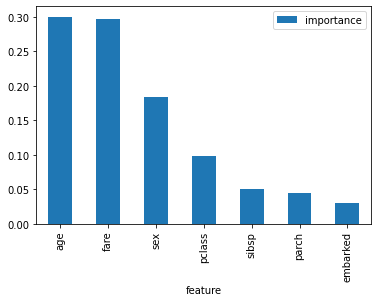

In [ ]:
#visualize importances

importances.plot.bar()

In [ ]:
# print the prediction of the random forest classifier

pred = model[6].predict(X_test)
print(pred)

print()

#Print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


survived      int64

*   List item
*   List item


pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64

In [ ]:
#my survival
my_survival = [[3, 0, 42, 2, 0, 0, 1]]

#scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#print prediction of my survival using random forest classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Oh no! You did not make it. ')
else:
  print('Nice! You survived')  



[0]
Oh no! You did not make it. 


In [ ]:
# to change my chances of survival, change the list values to the best scenario per past observations

#my_survival = [[3, 0, 42, 2, 0, 0, 1]]